In [ ]:
# prepare training and testing data

In [ ]:
# getting folders of images and saving them into train and test arrays

import os

train_location = 'drive/My Drive/NN_Assignment/downsized/train'
test_location = 'drive/My Drive/NN_Assignment/downsized/test'
train_list = []
test_list = []

# save train and test directories in a list, sorted alphabetically
for train_dir in os.listdir(train_location):
  train_list.append(train_dir)
train_list = sorted(train_list)
for test_dir in os.listdir(test_location):
  test_list.append(test_dir)
test_list = sorted(test_list)

# check if training list is equals to testing list
print(train_list == test_list)

True


In [ ]:
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
from sklearn.externals import joblib

img_cols, img_rows = 32, 32

# prepare training data
train_location = 'drive/My Drive/NN_Assignment/downsized/train'
training_data = []
x_train = []
y_train = []

def create_train_data():
  for data in train_list:
    path = os.path.join(train_location, data)
    class_num = train_list.index(data)
    
    # iterate over images by directories alphabetically
    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (img_cols, img_rows))  # resize to normalize data size
        training_data.append([new_array, class_num])  # add this to our training_list
      except Exception as e: 
        pass
  return training_data

training_data = create_train_data()

random.shuffle(training_data)
for features,label in training_data:
  x_train.append(features)
  y_train.append(label)
x_train = np.array(x_train).reshape(len(training_data), img_rows, img_cols, 3)
y_train = np.array(y_train).reshape(len(training_data))

# save data in pickle file
joblib.dump(x_train, "x_train.pkl")
joblib.dump(y_train, "y_train.pkl")

In [ ]:
# prepare testing data
test_location = 'drive/My Drive/NN_Assignment/downsized/test'
testing_data = []
x_test = []
y_test = []

def create_test_data():
  for data in test_list:
    path = os.path.join(test_location, data)
    class_num = test_list.index(data)
    
    # iterate over images by directories alphabetically
    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (img_cols, img_rows))  # resize to normalize data size
        testing_data.append([new_array, class_num])  # add this to our testing_list
      except Exception as e: 
        pass
  return testing_data

testing_data = create_test_data()

for features,label in testing_data:
  x_test.append(features)
  y_test.append(label)
x_test = np.array(x_test).reshape(len(testing_data), img_rows, img_cols, 3)
y_test = np.array(y_test).reshape(len(testing_data))

# save data in pickle file
joblib.dump(x_test, "x_test.pkl")
joblib.dump(y_test, "y_test.pkl")

In [1]:
# load CIFAR trained weights
weights_path = 'drive/My Drive/NN_Assignment/Weights/cifar.h5'

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Instructions for updating:
non-resource variables are not supported in the long term
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [ ]:
# define the model to fine-tune and begin training

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import plot_model
from keras import regularizers
from imgaug import augmenters as iaa
import cv2
from keras import backend as K
from sklearn.externals import joblib

epochs = 50
batch_size = 64
img_width, img_height = 32, 32
weight_decay = 0.00005

if K.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)

def create_functional_model():
  model = keras.Sequential([    
  keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
  keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),  
  keras.layers.BatchNormalization(),
  
  keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),  
  
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),
  
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),
  
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),

  keras.layers.Flatten(),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.5),   
  keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return model

pretrained_model = create_functional_model()
pretrained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)        

In [10]:
pretrained_model = create_functional_model()
model = keras.Sequential(pretrained_model)
pretrained_model.load_weights(weights_path)

# # baseline model
# extracted_layers = pretrained_model.layers[:-1]
# extracted_layers.append(keras.layers.Dense(100, name='dense_7', activation='softmax'))
# model = keras.Sequential(extracted_layers)

# # model A:
# extracted_layers = pretrained_model.layers[:-9]
# extracted_layers.append(keras.layers.Conv2D(filters=512, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# extracted_layers.append(keras.layers.Conv2D(filters=512, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# extracted_layers.append(keras.layers.Conv2D(filters=512, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# extracted_layers.append(keras.layers.AveragePooling2D(pool_size=(2,2)))
# extracted_layers.append(keras.layers.BatchNormalization())
# extracted_layers.append(keras.layers.Flatten())
# extracted_layers.append(keras.layers.Dense(512, activation=tf.nn.relu))
# extracted_layers.append(keras.layers.Dropout(0.7))   
# extracted_layers.append(keras.layers.Dense(100, name='dense_7', activation='softmax'))
# model = keras.Sequential(extracted_layers)

# # model B
# extracted_layers = pretrained_model.layers[:-9]
# extracted_layers.append(keras.layers.Conv2D(filters=512, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# extracted_layers.append(keras.layers.Conv2D(filters=512, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# extracted_layers.append(keras.layers.Conv2D(filters=512, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# extracted_layers.append(keras.layers.AveragePooling2D(pool_size=(2,2)))
# extracted_layers.append(keras.layers.BatchNormalization())
# extracted_layers.append(keras.layers.Flatten())
# extracted_layers.append(keras.layers.Dense(100, name='dense_7', activation='softmax'))
# model = keras.Sequential(extracted_layers)

# model C
def create_functional_model():
  model = keras.Sequential([    
  keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
  keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
  keras.layers.AveragePooling2D(pool_size=(2,2)),  
  keras.layers.BatchNormalization(),  
  keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.AveragePooling2D(pool_size=(2,2)),    
  keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.AveragePooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),  
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=256, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.AveragePooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),  
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.Conv2D(filters=512, kernel_size=1, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
  keras.layers.AveragePooling2D(pool_size=(2,2)),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.7),   
  keras.layers.Dense(100, activation=tf.nn.softmax)
  ])
  return model
model = create_functional_model()

# baseline: 24, model A: 22, model B: 24, model C: 24
for layer in model.layers[:24]:
   layer.trainable = False
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_11 (Averag (None, 8, 8, 64)         

In [11]:
# training with augmentation
x_train = joblib.load('drive/My Drive/NN_Assignment/x_train.pkl')
y_train = joblib.load('drive/My Drive/NN_Assignment/y_train.pkl')
x_test = joblib.load('drive/My Drive/NN_Assignment/x_test.pkl')
y_test = joblib.load('drive/My Drive/NN_Assignment/y_test.pkl')

seq = iaa.Sequential([
    iaa.Fliplr(0.5)
])

seq2 = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 0.5))
])

images_aug = seq.augment_images(x_train)
new_x_train = np.append(x_train, images_aug, axis=0)
images_aug2 = seq2.augment_images(new_x_train)
new_x_train = np.append(images_aug2, new_x_train, axis=0)

new_y_train = np.append(y_train, y_train, axis=0)
new_y_train = np.append(new_y_train, new_y_train, axis=0)

new_x_train = new_x_train/255.0
x_test = x_test/255.0

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
trainmodel = model.fit(new_x_train, new_y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=64, shuffle=True)

loss, acc = model.evaluate(x_test, y_test)
print("Accuracy: {:5.2f}%".format(100*acc))

Epoch 1/50
125/125 [==============================] - 1s 10ms/step - loss: 4.7307 - accuracy: 0.0075 - val_loss: 4.7301 - val_accuracy: 0.0100
Epoch 2/50
125/125 [==============================] - 1s 8ms/step - loss: 4.7306 - accuracy: 0.0072 - val_loss: 4.7300 - val_accuracy: 0.0100
Epoch 3/50
125/125 [==============================] - 1s 8ms/step - loss: 4.7306 - accuracy: 0.0072 - val_loss: 4.7300 - val_accuracy: 0.0100
Epoch 4/50
125/125 [==============================] - 1s 8ms/step - loss: 4.7305 - accuracy: 0.0070 - val_loss: 4.7300 - val_accuracy: 0.0110
Epoch 5/50
125/125 [==============================] - 1s 8ms/step - loss: 4.7305 - accuracy: 0.0061 - val_loss: 4.7299 - val_accuracy: 0.0100
Epoch 6/50
125/125 [==============================] - 1s 8ms/step - loss: 4.7305 - accuracy: 0.0074 - val_loss: 4.7299 - val_accuracy: 0.0100
Epoch 7/50
125/125 [==============================] - 1s 8ms/step - loss: 4.7304 - accuracy: 0.0068 - val_loss: 4.7299 - val_accuracy: 0.0090
Epoch

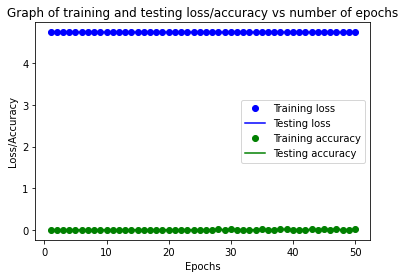

<Figure size 432x288 with 0 Axes>

In [12]:
#plot accuracy of model in a graph
history = trainmodel.history
history.keys()

acc = history['val_accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Testing loss')
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'go', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'g', label='Testing accuracy')
plt.title('Graph of training and testing loss/accuracy vs number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()

plt.show()
plt.savefig('evaluation.png')

In [ ]:
model.save('model_c.h5')

In [13]:
# make predictions
import cv2
import numpy as np
from tqdm import tqdm
import os

correct = 0
wrong = 0

test_location = 'drive/My Drive/NN_Assignment/downsized/test'
test_list = []

for test_dir in os.listdir(test_location):
  test_list.append(test_dir)
test_list = sorted(test_list)

for data in test_list:
    path = os.path.join(test_location, data)
    class_num = test_list.index(data)
    
    # iterate over images by directories alphabetically
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))  # convert to array
      images = np.expand_dims(img_array, axis = 0)
      predictions = model.predict(images)
      print("Actual Class:", class_num, test_list[class_num], 
            "\t Prediction:", np.argmax(predictions), test_list[np.argmax(predictions, axis=1)[0]])
      if(class_num == np.argmax(predictions)):
        correct +=1
      else:
        wrong +=1

print("Accuracy: {:5.2f}%".format(correct/(wrong + correct)*100))

Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 0 50_Cent 	 Prediction: 47 Madonna
Actual Class: 1 Abigail_Breslin 	 Prediction: 47 Madonna
Actual Class: 1 Abigail_Breslin 	 Prediction: 47 Madonna
Actual Class: 1 Abigail_Breslin 	 Prediction: 81 Rooney_Mara
Actual Class: 1 Abigail_Breslin 	 Prediction: 47 Madonna
Actual Class: 1 Abigail_Breslin 	 Prediction: 81 Rooney_Mara
Actual Class: 1 Abigail_Breslin 	 Prediction: 47 Madonna
Actual Class: 1 Abigail_Breslin 	 Prediction: 32 Jamie_Lee_Curtis
Actual Class: 1 Abigail_Breslin 	 Prediction: 81 Rooney_Mara
Actual Class: 1 Abigail_Breslin 	